In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/Shareddrives/BidPrice/DataWarehouse'
!ls

/content/drive/Shareddrives/BidPrice/DataWarehouse
20250302	    bids_processed.csv			intervals
Agg_2_output.csv    catboost_info			Modified_2_output.csv
Agg_3_output.csv    catprocessed_Modified_2_output.csv	Modified_3_output.csv
AutogluonModels     catprocessed_Modified_3_output.csv	notices_processed.csv
Basic_2_output.csv  DR_Modified_2_output.csv		PCA_output.csv
Basic_3_output.csv  DR_Modified_3_output.csv		saved_model


In [3]:
# Autogluon library 다운
!pip install autogluon -qU
print("Autogluon has been installed successfully.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.0/430.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

전처리 과정

In [5]:
import random
random.seed(42)

In [44]:
bid_range = 3
data = pd.read_csv(f"/content/drive/Shareddrives/BidPrice/DataWarehouse/DR_Modified_{bid_range}_output.csv")
list(data.columns)[-201:-21]

<ipython-input-44-0a363bbace7c>:2: DtypeWarning: Columns (0,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"/content/drive/Shareddrives/BidPrice/DataWarehouse/DR_Modified_{bid_range}_output.csv")


['010_001',
 '010_002',
 '010_003',
 '010_004',
 '010_005',
 '010_006',
 '010_007',
 '010_008',
 '010_009',
 '010_010',
 '020_001',
 '020_002',
 '020_003',
 '020_004',
 '020_005',
 '020_006',
 '020_007',
 '020_008',
 '020_009',
 '020_010',
 '020_011',
 '020_012',
 '020_013',
 '020_014',
 '020_015',
 '020_016',
 '020_017',
 '020_018',
 '020_019',
 '020_020',
 '050_001',
 '050_002',
 '050_003',
 '050_004',
 '050_005',
 '050_006',
 '050_007',
 '050_008',
 '050_009',
 '050_010',
 '050_011',
 '050_012',
 '050_013',
 '050_014',
 '050_015',
 '050_016',
 '050_017',
 '050_018',
 '050_019',
 '050_020',
 '050_021',
 '050_022',
 '050_023',
 '050_024',
 '050_025',
 '050_026',
 '050_027',
 '050_028',
 '050_029',
 '050_030',
 '050_031',
 '050_032',
 '050_033',
 '050_034',
 '050_035',
 '050_036',
 '050_037',
 '050_038',
 '050_039',
 '050_040',
 '050_041',
 '050_042',
 '050_043',
 '050_044',
 '050_045',
 '050_046',
 '050_047',
 '050_048',
 '050_049',
 '050_050',
 '100_001',
 '100_002',
 '100_003',
 '10

In [57]:
bid_range = 3
data = pd.read_csv(f"/content/drive/Shareddrives/BidPrice/DataWarehouse/DR_Modified_{bid_range}_output.csv")
# 중복된 row 제거
data = data.drop_duplicates()

X = pd.concat([data.iloc[:-3372, 1:5], data.iloc[:-3372:, -20:]], axis=1)
Y = data.iloc[:-3372:, -201:-21]
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (2019, 24)
Y shape: (2019, 180)


<ipython-input-57-3c9481a760f0>:2: DtypeWarning: Columns (0,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"/content/drive/Shareddrives/BidPrice/DataWarehouse/DR_Modified_{bid_range}_output.csv")


In [74]:
duplicate_count = data.iloc[:-3372, 1:5].duplicated().sum()
print("중복 행의 개수:", duplicate_count)

중복 행의 개수: 1


In [58]:
Y.isna().sum()

,0
010_001,0
010_002,0
010_003,0
010_004,0
010_005,0
...,...
100_096,0
100_097,0
100_098,0
100_099,0


In [ ]:
# # Autogluon 관련
# # from autogluon.tabular import TabularDataset, TabularPredictor

# # scikit-learn 메트릭
# from sklearn.metrics import r2_score, mean_squared_error

# # Colab 환경이라 가정
# # (만약 필요하다면) saved_model 디렉토리 생성
# os.makedirs("saved_model", exist_ok=True)
# # 데이터 로드
# X = pd.read_csv("Modified_X_Range2.csv")
# Y = pd.read_csv("Modified_Y_Range2.csv")
# # 공고번호 제거
# if "공고번호" in Y.columns:
#     Y.drop("공고번호", axis=1, inplace=True)
# # 예시: 필요한 컬럼 4개 선택
# X = X[["log_기초금액_norm", "투찰률_norm","A값/기초금액_norm", "log_참여업체수_norm"]]
# X = pd.DataFrame(X)
# Y = pd.DataFrame(Y)

# print("X shape:", X.shape)
# print("Y shape:", Y.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'Modified_X_Range2.csv'

**항상, 중복된 데이터가 있는지 조사할 것**

In [59]:
# 1️⃣ 결측값이 있는 행 찾기 (투찰률_norm이 NaN인 행)
rows_to_delete = X[X['투찰률_norm'].isna()].index

# 2️⃣ X와 Y에서 동일한 행 삭제
X = X.drop(index=rows_to_delete)
Y = Y.drop(index=rows_to_delete)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# 1. train test dataset 분리 - 이후 저장까지 미리 해둘 것.
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)
train_X.to_csv("train_Combined_Modified_X_Range2.csv", index=False)
train_Y.to_csv("train_Combined_Modified_Y_Range2.csv", index=False)
test_X.to_csv("test_Combined_Modified_X_Range2.csv", index=False)
test_Y.to_csv("test_Combined_Modified_Y_Range2.csv", index=False)
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((1614, 24), (1614, 180), (404, 24), (404, 180))

In [61]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((1614, 24), (1614, 180), (404, 24), (404, 180))

## 발전 방향
1. (O)train test 분리 후 사용하도록 설정.
1. GPU를 사용해서 병렬처리를 도움
1. MSE 오차 등 여러 가지 오차를 함께 eval할 수 있도록
    results_list.append({
        'target': target_col,
        'best_model': best_model_name,
        'r2_score_val': best_score,
        'mse_val': mse_val
    })

1. RF 등 모델에서 - 어떤 파라미터를 사용했는지 확인

In [62]:
# # prompt: save train_X, ... in the folder new folder make: backup_traintest

# import os

# # Create the backup directory if it doesn't exist
# backup_dir = "backup_traintest"
# os.makedirs(backup_dir, exist_ok=True)

# # Save the dataframes to the backup directory
# train_X.to_csv(os.path.join(backup_dir, "train_X.csv"), index=False)
# train_Y.to_csv(os.path.join(backup_dir, "train_Y.csv"), index=False)
# test_X.to_csv(os.path.join(backup_dir, "test_X.csv"), index=False)
# test_Y.to_csv(os.path.join(backup_dir, "test_Y.csv"), index=False)
# import them into new csvs df
# train_X = pd.read_csv("train_Combined_Modified_X_Range2.csv")
# train_Y = pd.read_csv("train_Combined_Modified_Y_Range2.csv")
# test_X = pd.read_csv("test_Combined_Modified_X_Range2.csv")
# test_Y = pd.read_csv("test_Combined_Modified_Y_Range2.csv")

In [33]:
# 실제 target별 예시.
from autogluon.tabular import TabularPredictor, TabularDataset

# ✅ 예제: 첫 번째 타겟 컬럼 사용
target_example = train_Y.columns[20]
train_data = TabularDataset(pd.concat([train_X, train_Y[target_example]], axis=1).dropna())

# ✅ AutoGluon 모델 학습
predictor = TabularPredictor(
    label=target_example,
    problem_type="regression",
    eval_metric="r2"
).fit(
    train_data=train_data,
    hyperparameters="default",  # ✅ GPU 사용 가능 모델만 설정
    presets='medium_quality_faster_train'#"best_quality",  # ✅ 성능과 속도의 균형 유지
)

# ✅ 학습된 모델 저장
model_save_path = f"saved_model/{target_example}"
predictor.save(model_save_path)
print(f"✅ Model for [{target_example}] saved at: {model_save_path}")

No path specified. Models will be saved in: "AutogluonModels/ag-20250305_085821"
Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          8
Memory Avail:       48.39 GB / 50.99 GB (94.9%)
Disk Space Avail:   188.89 GB / 235.68 GB (80.1%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/AutogluonModels/ag-20250305_085821"
Train Data Rows:    1122
Train Data Columns: 24
Label Column:       020_001
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:              

✅ Model for [020_001] saved at: saved_model/020_001


# 2단계 진행상황
1개 target에 대한 11개 모델에 대한 검사 OK.
RF, Lagre LGBM, 그리고 K neighborsDist를 사용하기로 결정하였다.

앞으로의 방향:

1. Distribution을 3개로만 설정하여 - 결과를 살펴보기
1. 모델 자동경로 설정 -> 한꺼번에 access할 수 있도록, 180개 target을 위한 모델 생성하기

In [35]:
# 1. Target -> 원하는 3개 모델만 설정
from autogluon.tabular import TabularPredictor, TabularDataset

# ✅ 1. 사용할 모델 지정 (AutoGluon 공식 모델명)
selected_models = {
    "NN_Torch": {"use_gpu": True},
    "GBM": {"device": "gpu"},
    "XGBoost": {"tree_method": "gpu_hist"}
}

# ✅ 2. 예제: 특정 타겟 컬럼 사용 (이전에 사용한 target_example)
target_example = train_Y.columns[20]  # 특정 타겟 선택
train_data = TabularDataset(pd.concat([train_X, train_Y[target_example]], axis=1).dropna())

# ✅ 3. AutoGluon 모델 학습 (선택한 3개 모델만 사용)
model_save_path = f"saved_model/{target_example}"
predictor = TabularPredictor(
    label=target_example,
    path=model_save_path,
    problem_type="regression",
    eval_metric="r2"
).fit(
    train_data=train_data,
    #hyperparameters=selected_models,  # ✅ RF, KNeighborsDist, LGBMLarge만 사용
    presets='medium_quality_faster_train',  # ✅ 성능과 속도의 균형 유지

)

# ✅ 4. 학습된 모델 저장
predictor.save(model_save_path)
print(f"✅ Model for [{target_example}] saved at: {model_save_path}")

# ✅ 5. 학습된 모델 목록 출력 (공식 AutoGluon 모델 이름)
model_names = predictor.model_names()
print(f"📌 Trained Models: {model_names}")


Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          8
Memory Avail:       47.05 GB / 50.99 GB (92.3%)
Disk Space Avail:   188.81 GB / 235.68 GB (80.1%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_001"
Train Data Rows:    1122
Train Data Columns: 24
Label Column:       020_001
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48222.42 MB
	Train Data (Original)  Memory Usage: 22.98 MB (0.0% of available memory)
	Inf

✅ Model for [020_001] saved at: saved_model/020_001
📌 Trained Models: ['KNeighborsUnif', 'KNeighborsDist', 'LightGBMXT', 'LightGBM', 'RandomForestMSE', 'CatBoost', 'ExtraTreesMSE', 'NeuralNetFastAI', 'XGBoost', 'NeuralNetTorch', 'LightGBMLarge', 'WeightedEnsemble_L2']


In [36]:
train_X[train_X.index == 1108], train_Y[train_Y.index == 1108][11:30]

(      log_기초금액_norm  A값/기초금액_norm  투찰률_norm  log_참여업체수_norm  100_082  100_083  \
 1108       0.334945     -0.059801 -4.040694       -2.131418      0.0   0.0625   
 
       100_084  100_085  100_086  100_087  ...  100_092  100_093  100_094  \
 1108      0.0   0.0625      0.0      0.0  ...      0.0      0.0      0.0   
 
       100_095  100_096  100_097  100_098  100_099  100_100  \
 1108      0.0   0.0625      0.0      0.0      0.0   0.0625   
 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

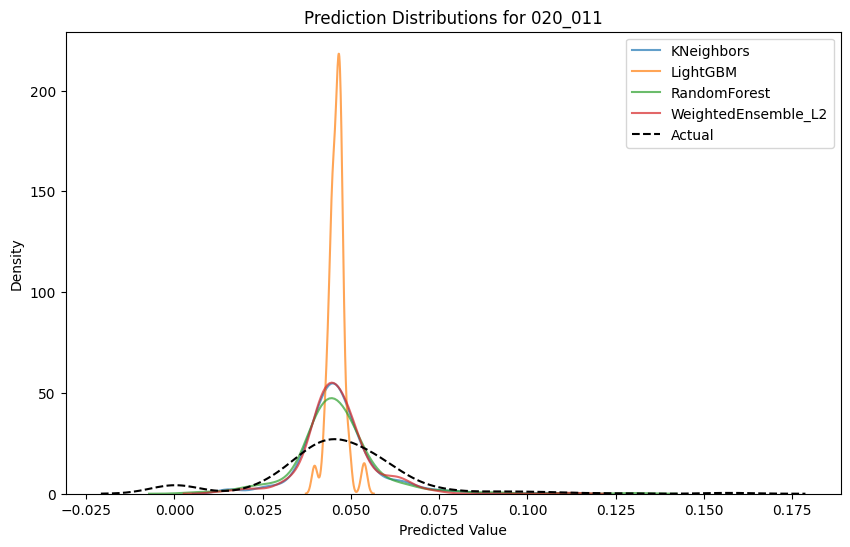

                 model  r2_score       mse      rmse       mae
0           KNeighbors -0.233288  0.000564  0.023754  0.015659
1             LightGBM -0.016514  0.000465  0.021565  0.013829
2         RandomForest -0.381553  0.000632  0.025141  0.015848
3  WeightedEnsemble_L2 -0.224686  0.000560  0.023671  0.015403


In [40]:
# ✅ 저장된 모델 경로
model_save_path = f"saved_model/020_011"  # 저장된 모델 위치 지정

# ✅ AutoGluon 모델 평가 실행
results_df = evaluate_saved_autogluon_model_target(
    model_save_path=model_save_path,
    test_X=test_X,
    test_Y=test_Y,
    target_example="020_011"  # 평가할 타겟 컬럼
)

# ✅ 평가 결과 출력
print(results_df)

In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from autogluon.tabular import TabularPredictor

def evaluate_saved_autogluon_model_target(model_save_path, test_X, test_Y, target_example):
    """
    저장된 AutoGluon 모델을 로드하여 평가하는 함수.

    Args:
        model_save_path (str): 저장된 AutoGluon 모델 경로.
        test_X (DataFrame): 테스트 데이터 (입력).
        test_Y (DataFrame): 테스트 데이터 (출력, 실제값).
        target_example (str): 평가할 타겟 변수명.

    Returns:
        pd.DataFrame: 모델별 평가 결과 DataFrame.
    """

    # ✅ 1. 저장된 AutoGluon 모델 로드
    predictor = TabularPredictor.load(model_save_path)
    model_names = predictor.model_names()  # 학습된 모델 리스트 가져오기

    #print(f"✅ Loaded AutoGluon Predictor from {model_save_path}")
    #print(f"📌 Available Models: {model_names}")

    # ✅ 2. 테스트 데이터 준비
    y_true = test_Y[target_example].values  # 실제값

    # ✅ 3. 평가 결과 저장 리스트 및 예측값 저장 딕셔너리
    evaluation_results = []
    predictions = {}

    for model in model_names:
        #print(f"\n=== Evaluating Model: {model} ===")

        try:
            # ✅ 3-1. 모델별 예측 수행
            y_pred = predictor.predict(test_X, model=model).values

            # ✅ 3-2. 성능 지표 계산
            r2 = r2_score(y_true, y_pred)
            mse = mean_squared_error(y_true, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_true, y_pred)

            # print(f"📌 Model: {model}")
            # print(f"📌 R² Score: {r2:.4f}")
            # print(f"📌 MSE: {mse:.4f}")
            # print(f"📌 RMSE: {rmse:.4f}")
            # print(f"📌 MAE: {mae:.4f}")

            # ✅ 3-3. 결과 저장
            evaluation_results.append({
                "model": model,
                "r2_score": r2,
                "mse": mse,
                "rmse": rmse,
                "mae": mae
            })

            # ✅ 3-4. 모델별 예측값 저장 (비교용)
            predictions[model] = y_pred

        except Exception as e:
            print(f"❌ Error evaluating {model}: {e}")
            continue  # 에러 발생 시 다음 모델 평가 진행

    # ✅ 4. 평가 결과 DataFrame 생성
    results_df = pd.DataFrame(evaluation_results)

    # ✅ 5. 결과 저장 경로 설정
    target_output_dir = os.path.join(model_save_path)
    os.makedirs(target_output_dir, exist_ok=True)

    results_csv_path = os.path.join(target_output_dir, "evaluation_results.csv")
    results_df.to_csv(results_csv_path, index=False)

    #print("\n=== ✅ Evaluation Complete ===")
    #print(f"📂 Results saved at: {results_csv_path}")

    # ✅ 6. 예측값 비교 그래프 (각 모델별 비교)
    plt.figure(figsize=(10, 6))

    for model, y_pred in predictions.items():
        sns.kdeplot(y_pred, label=model, alpha=0.7)

    sns.kdeplot(y_true, label="Actual", color="black", linestyle="--")
    plt.title(f"Prediction Distributions for {target_example}")
    plt.xlabel("Predicted Value")
    plt.ylabel("Density")
    plt.legend()
    plt.savefig(os.path.join(target_output_dir, "prediction_distribution.png"))
    plt.show()

    # ✅ 7. 각 모델별 예측 vs 실제값 비교 그래프 저장
    for model, y_pred in predictions.items():
        plt.figure(figsize=(6, 6))
        sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
        plt.title(f"Actual vs Predicted for {target_example} ({model})")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.savefig(os.path.join(target_output_dir, f"{model}_prediction_plot.png"))
        plt.close()

    return results_df


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from autogluon.tabular import TabularPredictor

def evaluate_saved_autogluon_models(model_save_path, test_X, test_Y, target_example, kde = False, scatter = True):
    """
    저장된 AutoGluon 모델을 로드하여 평가하는 함수 (Scatter Plot 추가).

    Args:
        model_save_path (str): 저장된 AutoGluon 모델 경로.
        test_X (DataFrame): 테스트 데이터 (입력).
        test_Y (DataFrame): 테스트 데이터 (출력, 실제값).
        target_example (str): 평가할 타겟 변수명.

    Returns:
        pd.DataFrame: 모델별 평가 결과 DataFrame.
    """

    # ✅ 1. 저장된 AutoGluon 모델 로드
    predictor = TabularPredictor.load(model_save_path)
    model_names = predictor.model_names()  # 학습된 모델 리스트 가져오기

    # ✅ 2. 테스트 데이터 준비
    y_true = test_Y[target_example].values  # 실제값

    # ✅ 3. 평가 결과 저장 리스트 및 예측값 저장 딕셔너리
    evaluation_results = []
    predictions = {}

    for model in model_names:
        try:
            # ✅ 3-1. 모델별 예측 수행
            y_pred = predictor.predict(test_X, model=model).values

            # ✅ 3-2. 성능 지표 계산
            r2 = r2_score(y_true, y_pred)
            mse = mean_squared_error(y_true, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_true, y_pred)

            # ✅ 3-3. 결과 저장
            evaluation_results.append({
                "model": model,
                "r2_score": r2,
                "mse": mse,
                "rmse": rmse,
                "mae": mae
            })

            # ✅ 3-4. 모델별 예측값 저장 (비교용)
            predictions[model] = y_pred

        except Exception as e:
            print(f"❌ Error evaluating {model}: {e}")
            continue  # 에러 발생 시 다음 모델 평가 진행

    # ✅ 4. 평가 결과 DataFrame 생성
    results_df = pd.DataFrame(evaluation_results)

    # ✅ 5. 결과 저장 경로 설정
    target_output_dir = os.path.join(model_save_path)
    os.makedirs(target_output_dir, exist_ok=True)

    results_csv_path = os.path.join(target_output_dir, "evaluation_results.csv")
    results_df.to_csv(results_csv_path, index=False)

    # ✅ 6. 예측값 비교 그래프 (각 모델별 비교)
    plt.figure(figsize=(10, 6))

    for model, y_pred in predictions.items():
        sns.kdeplot(y_pred, label=model, alpha=0.7)
    if kde:
        sns.kdeplot(y_true, label="Actual", color="black", linestyle="--")
        plt.title(f"Prediction Distributions for {target_example}")
        plt.xlabel("Predicted Value")
        plt.ylabel("Density")
        plt.legend()
        plt.savefig(os.path.join(target_output_dir, "prediction_distribution.png"))
        plt.show()

    # ✅ 7. 모든 모델을 한 번에 비교하는 Scatter Plot 생성
    plt.figure(figsize=(8, 8))
    for model, y_pred in predictions.items():
        plt.scatter(y_true, y_pred, alpha=0.5, label=model, s=6)

    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title(f"Actual vs Predicted Comparison ({target_example})")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.savefig(os.path.join(target_output_dir, "scatter_comparison.png"))
    plt.show()

    for model, y_pred in predictions.items():
        plt.scatter(y_true, y_pred, alpha=0.5, label=model, s=6)

        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
        plt.title(f"Actual vs Predicted Comparison ({target_example})")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.legend()
        plt.savefig(os.path.join(target_output_dir, "scatter_comparison.png"))
        plt.show()
    # ✅ 8. 각 모델별 개별 Scatter Plot 저장
    for model, y_pred in predictions.items():
        plt.figure(figsize=(6, 6))
        sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
        plt.title(f"Actual vs Predicted for {target_example} ({model})")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.savefig(os.path.join(target_output_dir, f"{model}_prediction_plot.png"))
        plt.close()

    return results_df


2. 180개 반복하도록 설정!


In [43]:
X.columns

Index(['log_기초금액_norm', 'A값/기초금액_norm', '투찰률_norm', 'log_참여업체수_norm',
       '100_082', '100_083', '100_084', '100_085', '100_086', '100_087',
       '100_088', '100_089', '100_090', '100_091', '100_092', '100_093',
       '100_094', '100_095', '100_096', '100_097', '100_098', '100_099',
       '100_100', 'BAAI_embedding'],
      dtype='object')

In [63]:
# 1. Target -> 원하는 3개 모델만 설정
# del range
from autogluon.tabular import TabularPredictor, TabularDataset
n = 180
def run_model(n):
    # 사용할 모델 지정: 각 모델별 GPU 지원 옵션을 포함한 다양한 하이퍼파라미터 구성
    selected_models = {
        # 신경망 모델: GPU 사용, 2가지 하이퍼파라미터 구성
        # "NN_Torch": [
        #     {"use_gpu": True},
        #     {"use_gpu": True, "epochs": 50}
        # ],
        # LightGBM: GPU 가속 설정
        "GBM": {"device": "gpu", "gpu_platform_id": 0, "gpu_device_id": 0},
        # XGBoost: GPU 가속 설정, 2가지 하이퍼파라미터 구성
        "XGB": [
            {"tree_method": "gpu_hist"},
            {"tree_method": "gpu_hist", "n_estimators": 200}
        ],
        # CatBoost: GPU 사용 설정
        "CAT": {"task_type": "GPU"},
        # 랜덤 포레스트 (GPU 지원하지 않음)
        "RF": {},
        # K-최근접 이웃 (GPU 지원하지 않음)
        "KNN": {},
        # 선형 회귀 (GPU 지원하지 않음)
        "LR": {},
        # Extra Trees (GPU 지원하지 않음)
        "XT": {}
    }

    # n개의 타겟 컬럼에 대해 모델 학습을 진행합니다.
    for num_column in range(n):
        target_example = train_Y.columns[num_column]
        # 해당 타겟 컬럼과 입력 데이터를 결합하여 학습 데이터 구성
        train_data = TabularDataset(pd.concat([train_X, train_Y[target_example]], axis=1).dropna())
        model_save_path = f"saved_model/{target_example}"

        # AutoGluon 모델 학습 (GPU 옵션 포함)
        predictor = TabularPredictor(
            label=target_example,
            path=model_save_path,
            problem_type="regression",
            eval_metric="r2"
        ).fit(
            train_data=train_data,
            hyperparameters=selected_models,  # GPU 옵션 포함된 다양한 모델 구성 사용
            presets='medium_quality_faster_train'
        )

        # 학습된 모델 저장
        predictor.save(model_save_path)
        print(f"✅ Model for [{target_example}] saved at: {model_save_path}")

isRun = input()
if isRun == 'y':
    n=180
    run_model(n)

Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          8
Memory Avail:       46.66 GB / 50.99 GB (91.5%)
Disk Space Avail:   188.79 GB / 235.68 GB (80.1%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/010_001"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       010_001
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47784.08 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Infe

✅ Model for [010_001] saved at: saved_model/010_001


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/010_002"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       010_002
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48014.43 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [010_002] saved at: saved_model/010_002


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/010_003"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       010_003
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48057.28 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [010_003] saved at: saved_model/010_003


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/010_004"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       010_004
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48053.29 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [010_004] saved at: saved_model/010_004


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/010_005"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       010_005
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48025.34 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [010_005] saved at: saved_model/010_005


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/010_006"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       010_006
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48047.14 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [010_006] saved at: saved_model/010_006


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/010_007"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       010_007
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48079.42 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [010_007] saved at: saved_model/010_007


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/010_008"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       010_008
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48061.31 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

[1000]	valid_set's l2: 0.365306	valid_set's r2: 0.923693


	0.9239	 = Validation score   (r2)
	2.24s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForest ...
	0.9172	 = Validation score   (r2)
	1.62s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
	0.8648	 = Validation score   (r2)
	2.21s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTrees ...
	0.8987	 = Validation score   (r2)
	0.56s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: XGBoost ...
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:40:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, 

✅ Model for [010_008] saved at: saved_model/010_008


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/010_009"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       010_009
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48058.24 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [010_009] saved at: saved_model/010_009


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/010_010"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       010_010
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48043.08 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [010_010] saved at: saved_model/010_010


	0.7615	 = Validation score   (r2)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	0.8903	 = Validation score   (r2)
	1.18s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForest ...
	0.8728	 = Validation score   (r2)
	1.66s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
	0.7946	 = Validation score   (r2)
	1.54s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTrees ...
	0.8625	 = Validation score   (r2)
	0.55s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: XGBoost ...
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:41:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU traini

✅ Model for [020_001] saved at: saved_model/020_001


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_002"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_002
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48065.86 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_002] saved at: saved_model/020_002


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_003"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_003
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48050.86 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_003] saved at: saved_model/020_003


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_004"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_004
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48033.01 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_004] saved at: saved_model/020_004


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_005"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_005
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48016.23 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_005] saved at: saved_model/020_005


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_006"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_006
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48056.09 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_006] saved at: saved_model/020_006


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_007"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_007
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48047.77 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_007] saved at: saved_model/020_007


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_008"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_008
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48052.97 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_008] saved at: saved_model/020_008


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_009"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_009
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48023.65 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_009] saved at: saved_model/020_009


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_010"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_010
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48020.65 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_010] saved at: saved_model/020_010


Fitting 8 L1 models, fit_strategy="sequential" ...
Fitting model: KNeighbors ...
	0.668	 = Validation score   (r2)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	0.846	 = Validation score   (r2)
	1.17s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForest ...
	0.8402	 = Validation score   (r2)
	1.63s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
	0.7848	 = Validation score   (r2)
	1.26s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTrees ...
	0.8529	 = Validation score   (r2)
	0.56s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: XGBoost ...
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:43:26] WARNING: /workspace/src/common/error_ms

✅ Model for [020_011] saved at: saved_model/020_011


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_012"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_012
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48019.35 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_012] saved at: saved_model/020_012


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_013"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_013
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48052.90 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_013] saved at: saved_model/020_013


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_014"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_014
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48047.42 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_014] saved at: saved_model/020_014


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_015"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_015
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48046.41 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_015] saved at: saved_model/020_015


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_016"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_016
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48051.38 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_016] saved at: saved_model/020_016


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_017"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_017
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48026.63 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_017] saved at: saved_model/020_017


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_018"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_018
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48045.35 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_018] saved at: saved_model/020_018


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_019"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_019
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48028.44 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_019] saved at: saved_model/020_019


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/020_020"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       020_020
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48001.58 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [020_020] saved at: saved_model/020_020


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_001"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_001
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47972.84 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_001] saved at: saved_model/050_001


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_002"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_002
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48012.59 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_002] saved at: saved_model/050_002


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_003"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_003
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47987.24 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_003] saved at: saved_model/050_003


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_004"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_004
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47977.48 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_004] saved at: saved_model/050_004


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_005"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_005
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47986.19 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_005] saved at: saved_model/050_005


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_006"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_006
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48008.87 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_006] saved at: saved_model/050_006


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_007"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_007
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48007.69 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_007] saved at: saved_model/050_007


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_008"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_008
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48007.96 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_008] saved at: saved_model/050_008


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_009"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_009
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48010.90 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_009] saved at: saved_model/050_009


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_010"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_010
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47999.59 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_010] saved at: saved_model/050_010


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_011"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_011
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47992.57 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_011] saved at: saved_model/050_011


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_012"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_012
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48011.46 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_012] saved at: saved_model/050_012


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_013"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_013
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48029.89 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_013] saved at: saved_model/050_013


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_014"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_014
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48010.49 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_014] saved at: saved_model/050_014


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_015"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_015
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48014.82 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_015] saved at: saved_model/050_015


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_016"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_016
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48003.74 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_016] saved at: saved_model/050_016


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_017"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_017
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48007.39 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_017] saved at: saved_model/050_017


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_018"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_018
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48031.48 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_018] saved at: saved_model/050_018


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_019"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_019
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48013.12 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_019] saved at: saved_model/050_019


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_020"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_020
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47970.83 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_020] saved at: saved_model/050_020


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_021"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_021
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47972.32 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_021] saved at: saved_model/050_021


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_022"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_022
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47972.51 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_022] saved at: saved_model/050_022


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_023"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_023
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47979.72 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_023] saved at: saved_model/050_023


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_024"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_024
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48002.74 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_024] saved at: saved_model/050_024


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_025"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_025
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48015.54 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_025] saved at: saved_model/050_025


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_026"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_026
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48017.47 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_026] saved at: saved_model/050_026


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_027"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_027
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48006.36 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_027] saved at: saved_model/050_027


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_028"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_028
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48004.05 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_028] saved at: saved_model/050_028


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_029"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_029
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48015.01 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_029] saved at: saved_model/050_029


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_030"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_030
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47940.56 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_030] saved at: saved_model/050_030


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_031"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_031
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47919.40 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_031] saved at: saved_model/050_031


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_032"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_032
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47937.40 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_032] saved at: saved_model/050_032


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_033"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_033
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47947.14 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_033] saved at: saved_model/050_033


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_034"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_034
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47931.32 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_034] saved at: saved_model/050_034


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_035"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_035
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47959.72 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_035] saved at: saved_model/050_035


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_036"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_036
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47938.75 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_036] saved at: saved_model/050_036


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_037"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_037
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47936.51 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_037] saved at: saved_model/050_037


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_038"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_038
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47903.78 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

[1000]	valid_set's l2: 0.0332044	valid_set's r2: 0.86027


	0.8604	 = Validation score   (r2)
	2.5s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForest ...
	0.8461	 = Validation score   (r2)
	1.58s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
	0.8065	 = Validation score   (r2)
	2.73s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTrees ...
	0.8354	 = Validation score   (r2)
	0.63s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: XGBoost ...
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:54:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, U

✅ Model for [050_038] saved at: saved_model/050_038


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_039"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_039
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47963.96 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_039] saved at: saved_model/050_039


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_040"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_040
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47957.98 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_040] saved at: saved_model/050_040


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_041"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_041
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47956.64 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_041] saved at: saved_model/050_041


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_042"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_042
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47938.24 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_042] saved at: saved_model/050_042


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_043"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_043
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47901.03 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_043] saved at: saved_model/050_043


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_044"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_044
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47960.33 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_044] saved at: saved_model/050_044


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_045"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_045
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47942.55 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_045] saved at: saved_model/050_045


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_046"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_046
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47945.55 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_046] saved at: saved_model/050_046


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_047"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_047
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    47914.69 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_047] saved at: saved_model/050_047


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_048"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_048
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48548.62 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_048] saved at: saved_model/050_048


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_049"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_049
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48558.62 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_049] saved at: saved_model/050_049


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/050_050"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       050_050
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48573.71 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [050_050] saved at: saved_model/050_050


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_001"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_001
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48569.23 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_001] saved at: saved_model/100_001


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_002"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_002
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48559.52 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_002] saved at: saved_model/100_002


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_003"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_003
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48568.96 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_003] saved at: saved_model/100_003


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_004"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_004
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48562.08 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_004] saved at: saved_model/100_004


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_005"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_005
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48525.41 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_005] saved at: saved_model/100_005


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_006"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_006
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48546.14 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_006] saved at: saved_model/100_006


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_007"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_007
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48538.89 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_007] saved at: saved_model/100_007


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_008"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_008
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48553.41 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_008] saved at: saved_model/100_008


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_009"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_009
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48554.18 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_009] saved at: saved_model/100_009


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_010"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_010
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48557.85 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_010] saved at: saved_model/100_010


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_011"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_011
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48528.89 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_011] saved at: saved_model/100_011


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_012"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_012
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48543.76 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_012] saved at: saved_model/100_012


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_013"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_013
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48550.45 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_013] saved at: saved_model/100_013


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_014"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_014
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48561.28 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_014] saved at: saved_model/100_014


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_015"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_015
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48549.17 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_015] saved at: saved_model/100_015


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_016"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_016
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48549.39 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_016] saved at: saved_model/100_016


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_017"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_017
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48558.27 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_017] saved at: saved_model/100_017


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_018"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_018
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48570.82 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_018] saved at: saved_model/100_018


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_019"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_019
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48548.58 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_019] saved at: saved_model/100_019


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_020"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_020
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48524.85 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_020] saved at: saved_model/100_020


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_021"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_021
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48556.53 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_021] saved at: saved_model/100_021


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_022"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_022
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48520.43 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_022] saved at: saved_model/100_022


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_023"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_023
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48522.08 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_023] saved at: saved_model/100_023


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_024"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_024
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48529.69 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_024] saved at: saved_model/100_024


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_025"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_025
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48544.41 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_025] saved at: saved_model/100_025


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_026"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_026
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48552.44 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_026] saved at: saved_model/100_026


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_027"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_027
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48532.74 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_027] saved at: saved_model/100_027


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_028"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_028
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48548.77 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_028] saved at: saved_model/100_028


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_029"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_029
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48540.46 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_029] saved at: saved_model/100_029


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_030"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_030
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48550.64 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_030] saved at: saved_model/100_030


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_031"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_031
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48556.68 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_031] saved at: saved_model/100_031


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_032"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_032
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48560.94 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_032] saved at: saved_model/100_032


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_033"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_033
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48548.07 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_033] saved at: saved_model/100_033


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_034"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_034
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48527.21 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_034] saved at: saved_model/100_034


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_035"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_035
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48559.87 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_035] saved at: saved_model/100_035


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_036"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_036
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48549.60 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_036] saved at: saved_model/100_036


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_037"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_037
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48533.31 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_037] saved at: saved_model/100_037


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_038"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_038
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48540.87 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_038] saved at: saved_model/100_038


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_039"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_039
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48530.73 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_039] saved at: saved_model/100_039


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_040"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_040
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48545.46 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_040] saved at: saved_model/100_040


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_041"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_041
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48544.70 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_041] saved at: saved_model/100_041


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_042"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_042
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48515.69 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_042] saved at: saved_model/100_042


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_043"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_043
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48511.65 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_043] saved at: saved_model/100_043


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_044"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_044
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48518.32 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_044] saved at: saved_model/100_044


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_045"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_045
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48549.25 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_045] saved at: saved_model/100_045


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_046"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_046
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48523.82 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_046] saved at: saved_model/100_046


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_047"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_047
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48526.18 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_047] saved at: saved_model/100_047


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_048"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_048
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48504.08 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_048] saved at: saved_model/100_048


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_049"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_049
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48512.71 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_049] saved at: saved_model/100_049


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_050"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_050
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48506.15 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_050] saved at: saved_model/100_050


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_051"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_051
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48509.49 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_051] saved at: saved_model/100_051


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_052"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_052
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48503.45 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_052] saved at: saved_model/100_052


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_053"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_053
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48506.83 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_053] saved at: saved_model/100_053


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_054"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_054
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48500.05 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_054] saved at: saved_model/100_054


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_055"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_055
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48492.21 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_055] saved at: saved_model/100_055


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_056"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_056
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48489.46 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_056] saved at: saved_model/100_056


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_057"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_057
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48516.59 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_057] saved at: saved_model/100_057


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_058"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_058
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48513.37 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_058] saved at: saved_model/100_058


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_059"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_059
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48503.62 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_059] saved at: saved_model/100_059


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_060"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_060
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48504.08 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_060] saved at: saved_model/100_060


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_061"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_061
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48503.66 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_061] saved at: saved_model/100_061


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_062"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_062
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48488.89 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_062] saved at: saved_model/100_062


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_063"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_063
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48522.69 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_063] saved at: saved_model/100_063


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_064"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_064
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48508.95 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_064] saved at: saved_model/100_064


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_065"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_065
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48507.96 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_065] saved at: saved_model/100_065


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_066"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_066
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48517.45 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_066] saved at: saved_model/100_066


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_067"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_067
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48527.28 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_067] saved at: saved_model/100_067


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_068"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_068
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48524.25 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_068] saved at: saved_model/100_068


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_069"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_069
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48492.65 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_069] saved at: saved_model/100_069


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_070"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_070
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48514.32 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_070] saved at: saved_model/100_070


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_071"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_071
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48484.74 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_071] saved at: saved_model/100_071


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_072"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_072
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48474.35 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_072] saved at: saved_model/100_072


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_073"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_073
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48527.46 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_073] saved at: saved_model/100_073


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_074"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_074
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48496.00 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_074] saved at: saved_model/100_074


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_075"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_075
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48520.04 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

[1000]	valid_set's l2: 0.013298	valid_set's r2: 0.827228


	0.8288	 = Validation score   (r2)
	3.54s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForest ...
	0.7955	 = Validation score   (r2)
	1.53s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
Default metric period is 5 because R2 is/are not implemented for GPU
Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
	0.7554	 = Validation score   (r2)
	2.27s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTrees ...
	0.8002	 = Validation score   (r2)
	0.55s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: XGBoost ...
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, 

✅ Model for [100_075] saved at: saved_model/100_075


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_076"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_076
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48498.45 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_076] saved at: saved_model/100_076


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_077"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_077
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48490.57 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_077] saved at: saved_model/100_077


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_078"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_078
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48519.16 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_078] saved at: saved_model/100_078


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_079"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_079
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48505.21 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_079] saved at: saved_model/100_079


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_080"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_080
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48518.16 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_080] saved at: saved_model/100_080


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_081"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_081
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48489.95 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_081] saved at: saved_model/100_081


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_082"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_082
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48475.82 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_082] saved at: saved_model/100_082


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_083"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_083
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48491.54 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_083] saved at: saved_model/100_083


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_084"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_084
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48477.62 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_084] saved at: saved_model/100_084


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_085"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_085
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48491.32 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_085] saved at: saved_model/100_085


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_086"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_086
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48511.37 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_086] saved at: saved_model/100_086


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_087"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_087
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48494.75 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_087] saved at: saved_model/100_087


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_088"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_088
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48514.84 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_088] saved at: saved_model/100_088


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_089"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_089
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48518.30 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_089] saved at: saved_model/100_089


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_090"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_090
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48475.86 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_090] saved at: saved_model/100_090


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_091"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_091
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48479.65 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_091] saved at: saved_model/100_091


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_092"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_092
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48496.35 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_092] saved at: saved_model/100_092


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_093"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_093
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48479.95 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_093] saved at: saved_model/100_093


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_094"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_094
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48489.53 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_094] saved at: saved_model/100_094


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_095"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_095
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48506.06 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_095] saved at: saved_model/100_095


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_096"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_096
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48498.58 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_096] saved at: saved_model/100_096


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_097"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_097
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48505.03 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_097] saved at: saved_model/100_097


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_098"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_098
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48514.90 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_098] saved at: saved_model/100_098


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_099"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_099
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48460.55 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_099] saved at: saved_model/100_099


Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/Shareddrives/BidPrice/DataWarehouse/saved_model/100_100"
Train Data Rows:    1614
Train Data Columns: 24
Label Column:       100_100
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    48490.32 MB
	Train Data (Original)  Memory Usage: 0.30 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerato

✅ Model for [100_100] saved at: saved_model/100_100


In [64]:
# 전체 실행 결과 확인
# ✅ 저장된 모델 경로
n = 180
for num_column in range(n):
    target_example = Y.columns[num_column]
    model_save_path = f"saved_model/{target_example}"  # 저장된 모델 위치 지정
    # ✅ AutoGluon 모델 평가 실행
    result_df = evaluate_saved_autogluon_models(
        model_save_path=model_save_path,
        test_X=test_X,
        test_Y=test_Y,
        target_example=target_example  # 평가할 타겟 컬럼
    )
    # ✅ 평가 결과 출력
    print(result_df)

Output hidden; open in https://colab.research.google.com to view.

In [65]:
print("Finished")

Finished


In [67]:
import pandas as pd

all_results = []  # 모든 타겟별 결과를 저장할 리스트

n =30  # 타겟 컬럼 개수

# 각 타겟별 평가 결과 수집
for num_column in range(n):
    target_example = Y.columns[num_column]
    model_save_path = f"saved_model/{target_example}"  # 저장된 모델 위치 지정

    # 평가 실행 (evaluate_saved_autogluon_models 함수 호출)
    result_df = evaluate_saved_autogluon_models(
        model_save_path=model_save_path,
        test_X=test_X,
        test_Y=test_Y,
        target_example=target_example
    )

    # 결과에 타겟 이름 추가
    result_df["target"] = target_example
    all_results.append(result_df)

# 모든 결과를 하나의 DataFrame으로 결합
summary_df = pd.concat(all_results, ignore_index=True)
print("전체 타겟에 대한 평가 결과:")
print(summary_df)

# 모델별 평균 MAE, MSE, RMSE, R² 계산 (예시)
avg_metrics = summary_df.groupby("model").agg({
    "mae": "mean",
    "mse": "mean",
    "rmse": "mean",
    "r2_score": "mean"
}).reset_index()

print("\n모델별 평균 평가 지표:")
print(avg_metrics)


Output hidden; open in https://colab.research.google.com to view.

<ipython-input-70-0acf3be826dc>:23: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-70-0acf3be826dc>:23: UserWarning: Glyph 44191 (\N{HANGUL SYLLABLE GES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-70-0acf3be826dc>:23: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-70-0acf3be826dc>:23: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-70-0acf3be826dc>:23: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-70-0acf3be826dc>:23: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-70-0acf3be826dc>:23: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

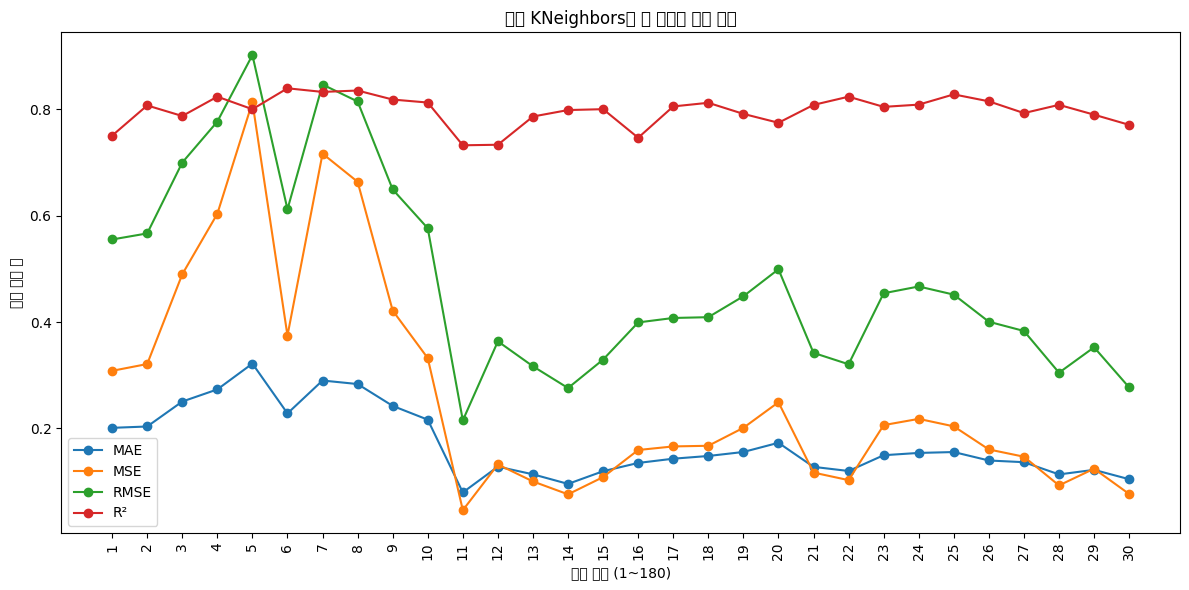

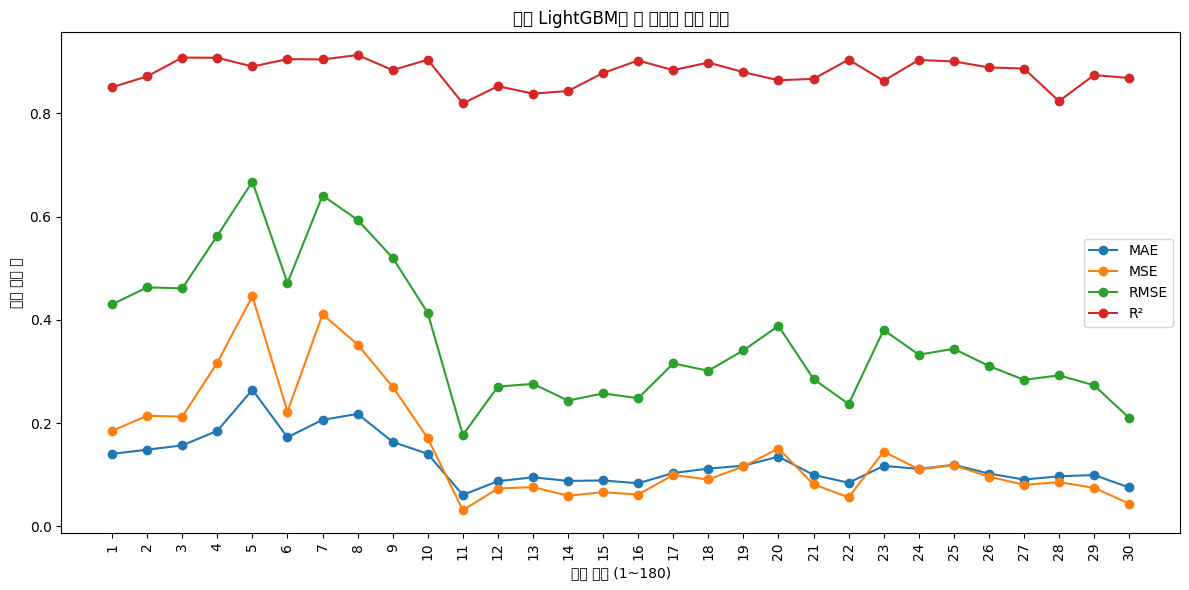

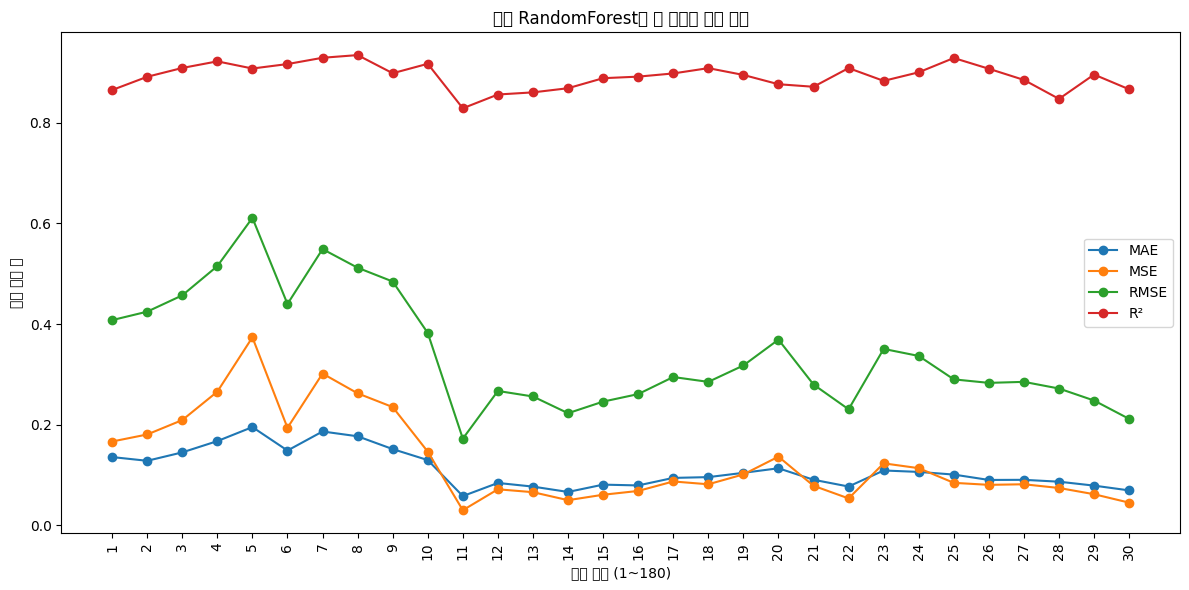

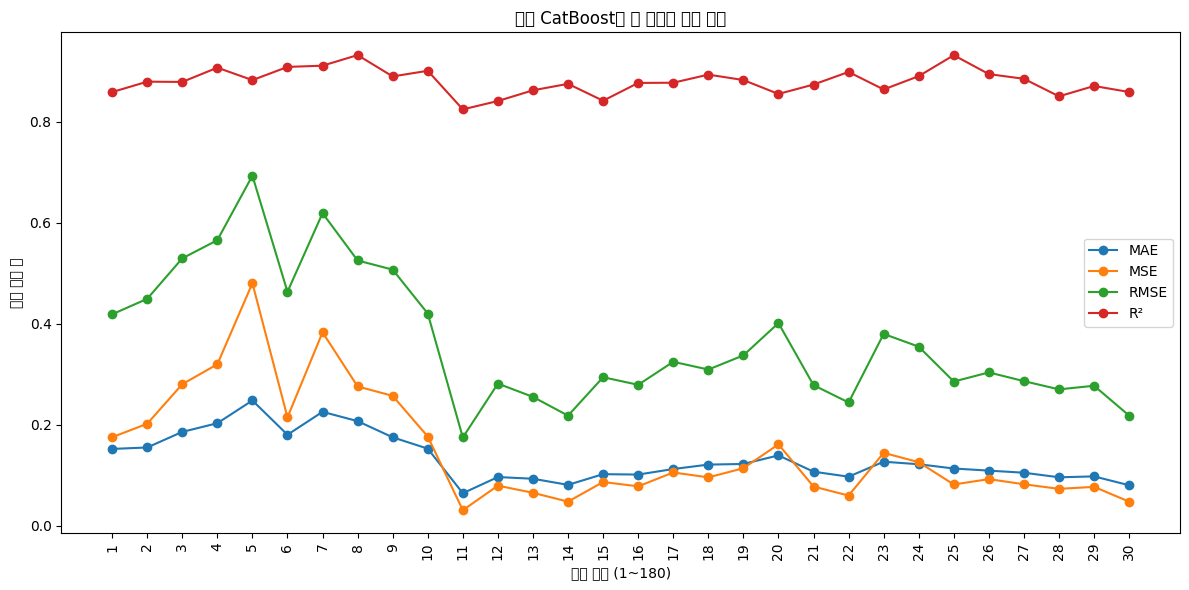

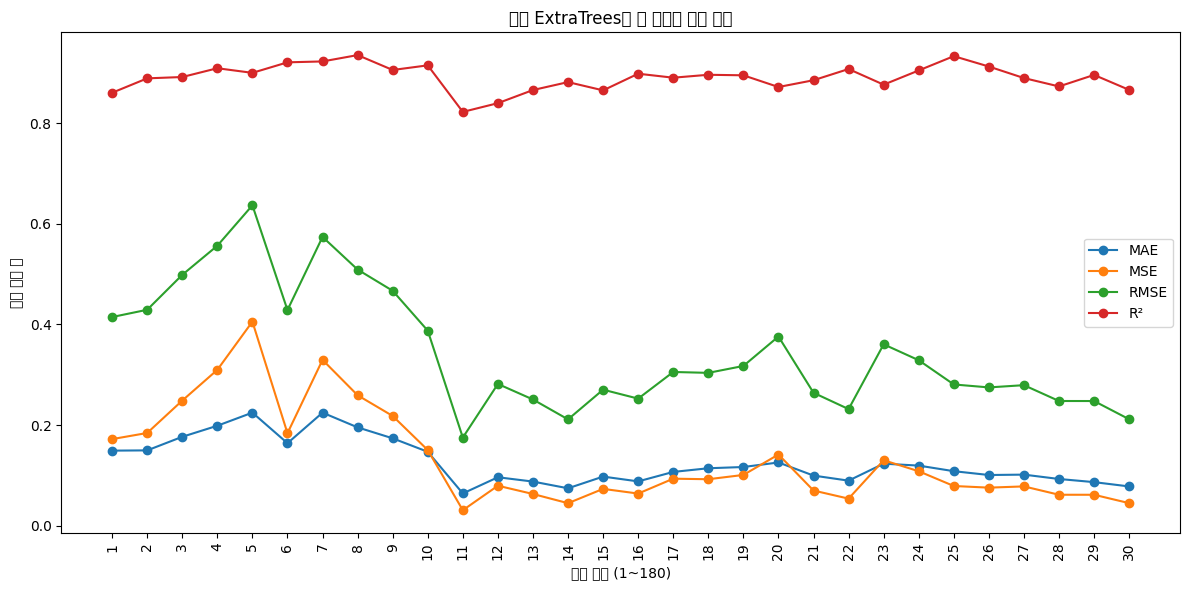

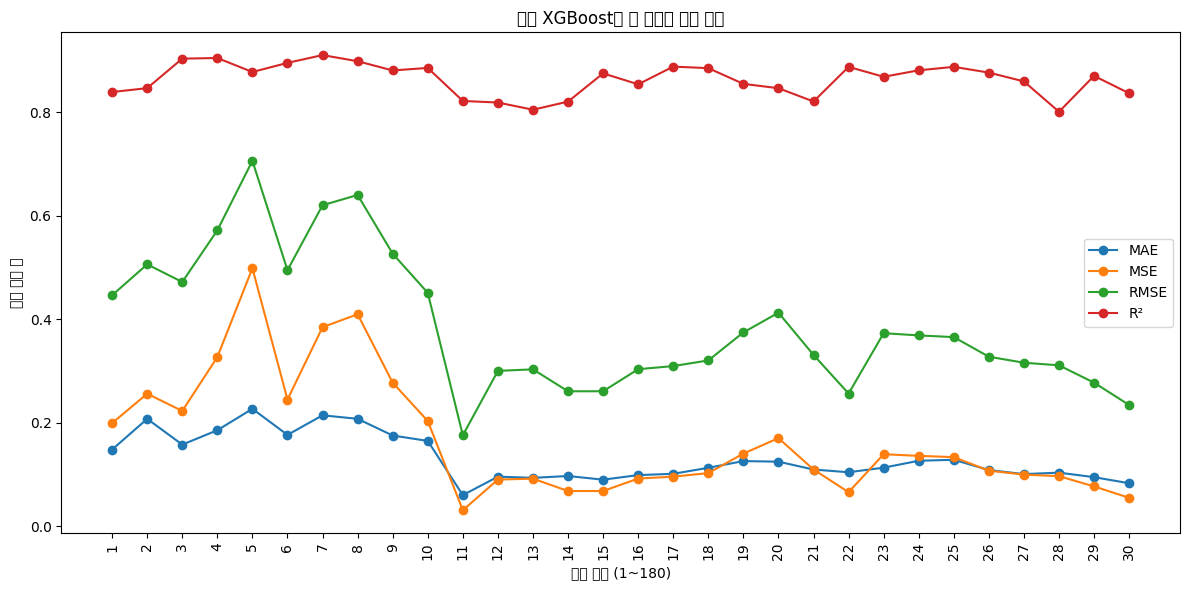

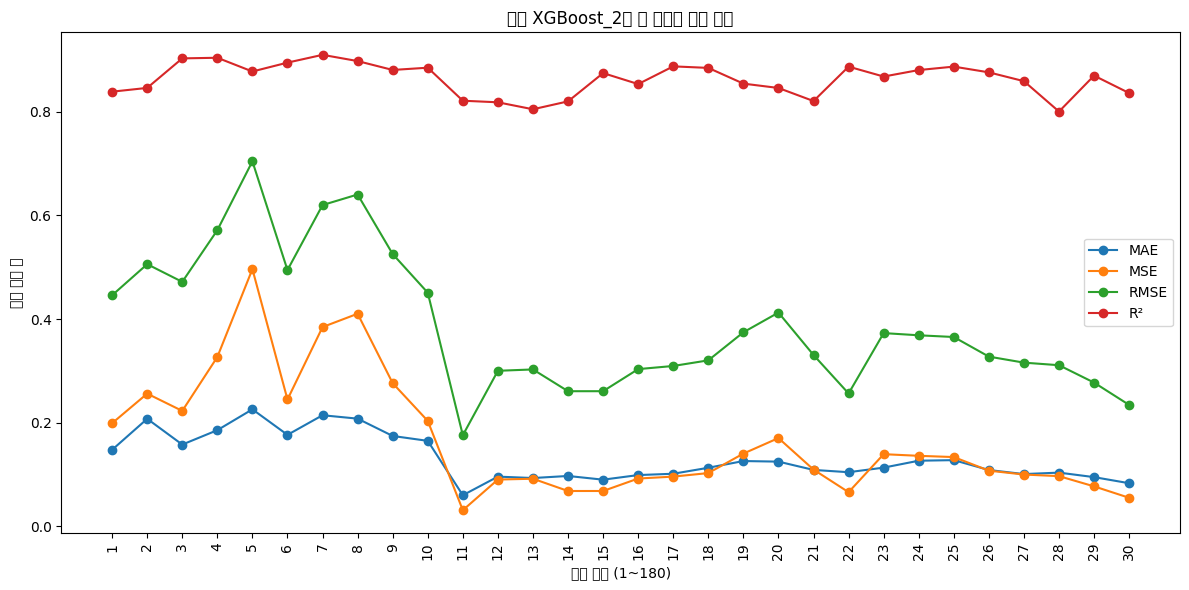

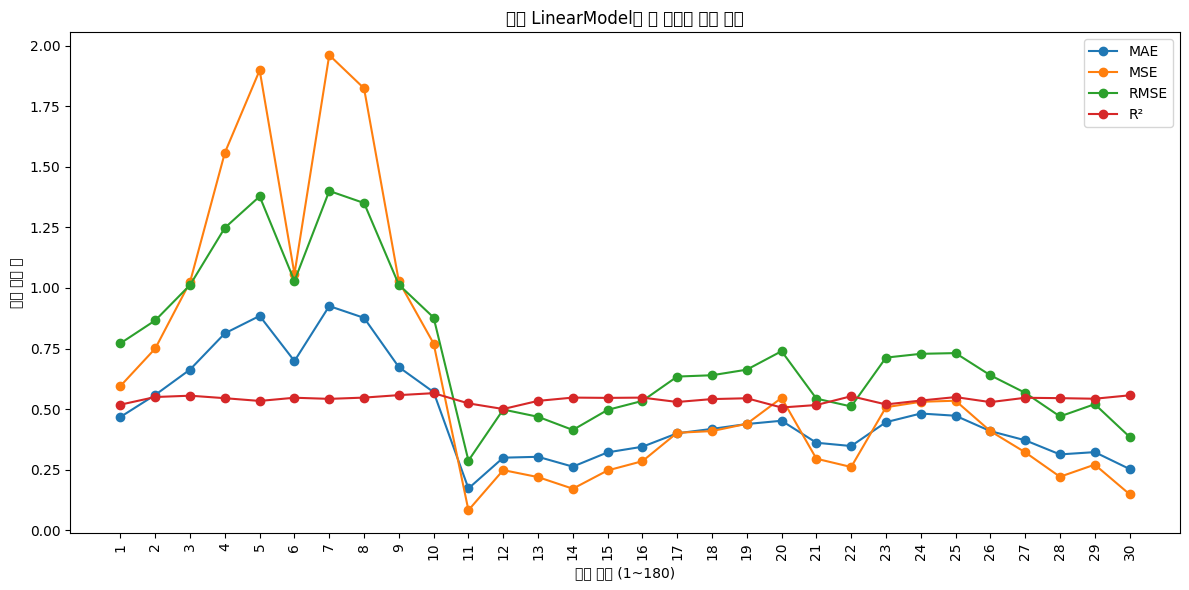

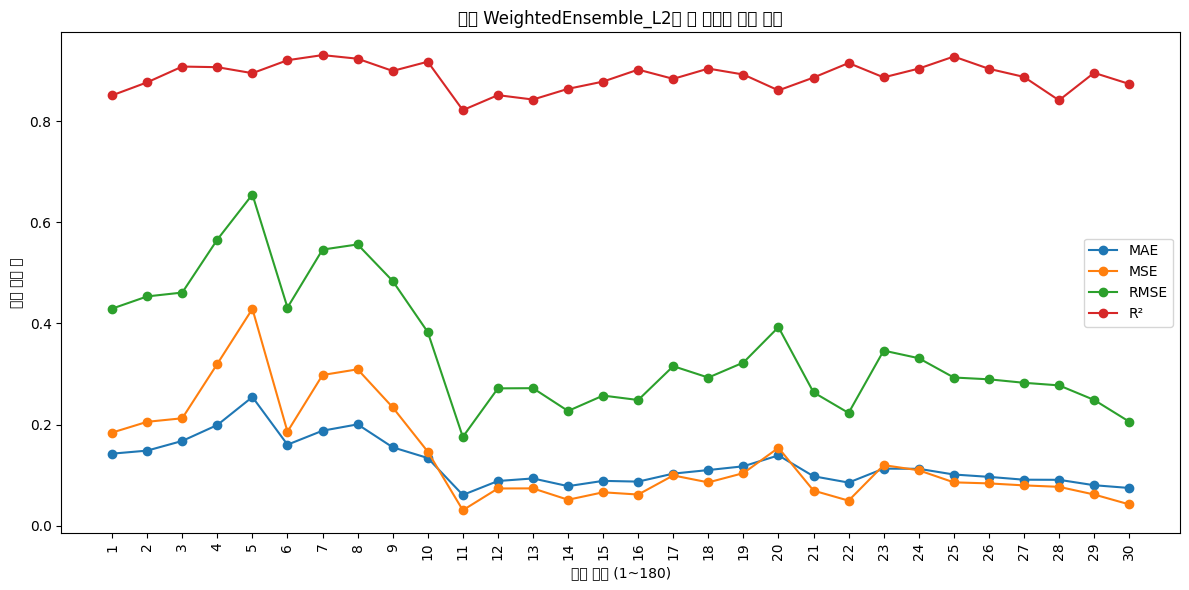

In [70]:
  # Y 컬럼의 원래 순서를 이용해 타겟 순서(인덱스)를 부여
target_order = list(Y.columns)
target_order_dict = {target: idx+1 for idx, target in enumerate(target_order)}
summary_df["target_idx"] = summary_df["target"].map(target_order_dict)

# 각 모델별로 개별 그래프를 생성
models = summary_df['model'].unique()

for m in models:
    model_df = summary_df[summary_df['model'] == m].sort_values("target_idx")

    plt.figure(figsize=(12, 6))
    plt.plot(model_df["target_idx"], model_df["mae"], marker='o', label='MAE')
    plt.plot(model_df["target_idx"], model_df["mse"], marker='o', label='MSE')
    plt.plot(model_df["target_idx"], model_df["rmse"], marker='o', label='RMSE')
    plt.plot(model_df["target_idx"], model_df["r2_score"], marker='o', label='R²')

    plt.xlabel("타겟 번호 (1~180)")
    plt.ylabel("평가 지표 값")
    plt.title(f"모델 {m}의 각 타겟별 평가 지표")
    plt.legend()
    plt.xticks(model_df["target_idx"], rotation=90)  # x축에 180개 눈금 표시
    plt.tight_layout()
    plt.show()


<ipython-input-72-26c7137a175e>:13: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-26c7137a175e>:13: UserWarning: Glyph 44191 (\N{HANGUL SYLLABLE GES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-26c7137a175e>:13: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-26c7137a175e>:13: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-26c7137a175e>:13: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-26c7137a175e>:13: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-26c7137a175e>:13: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

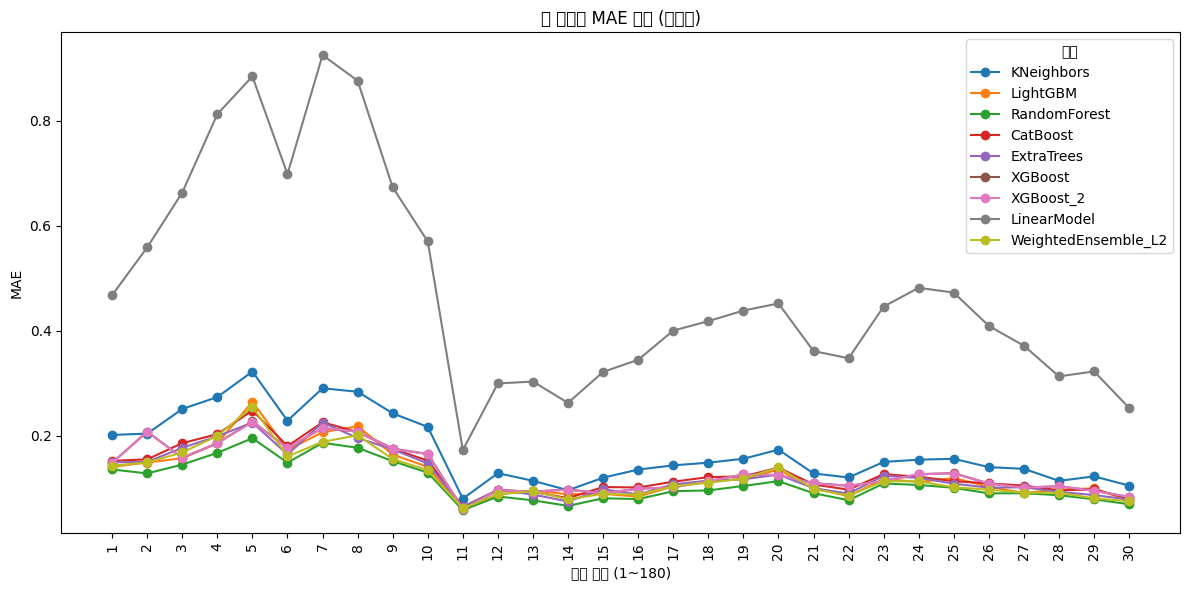

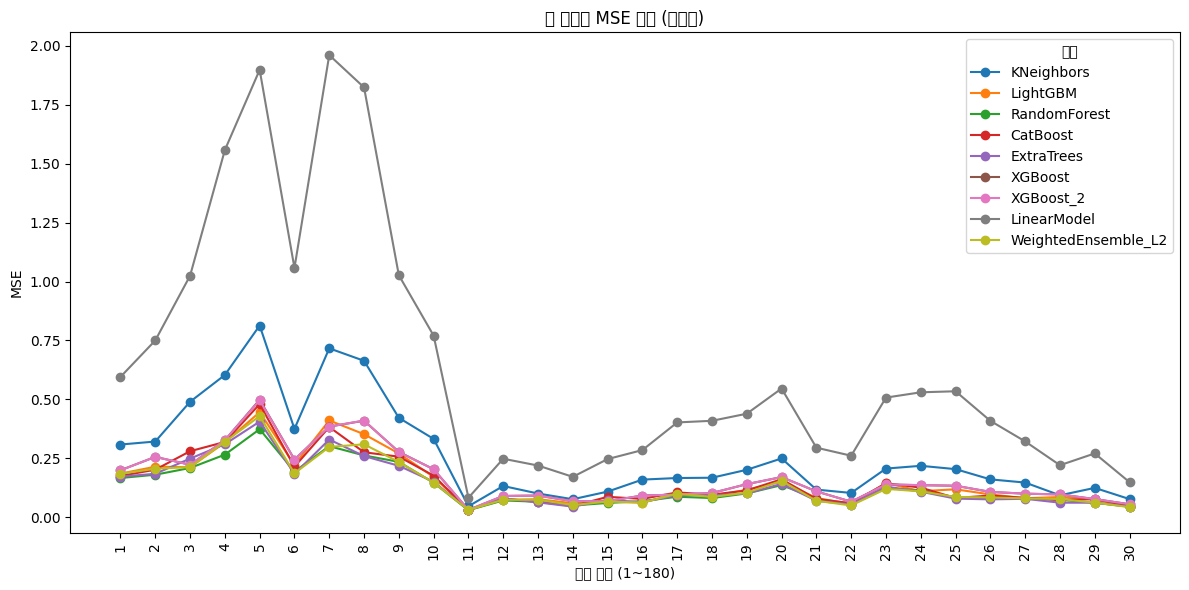

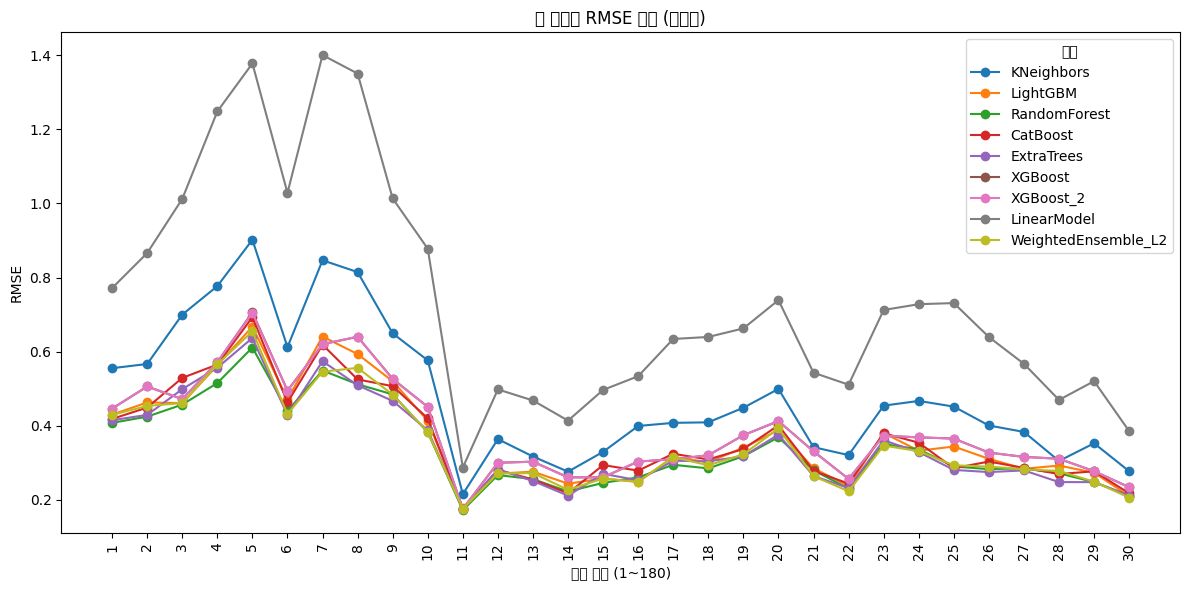

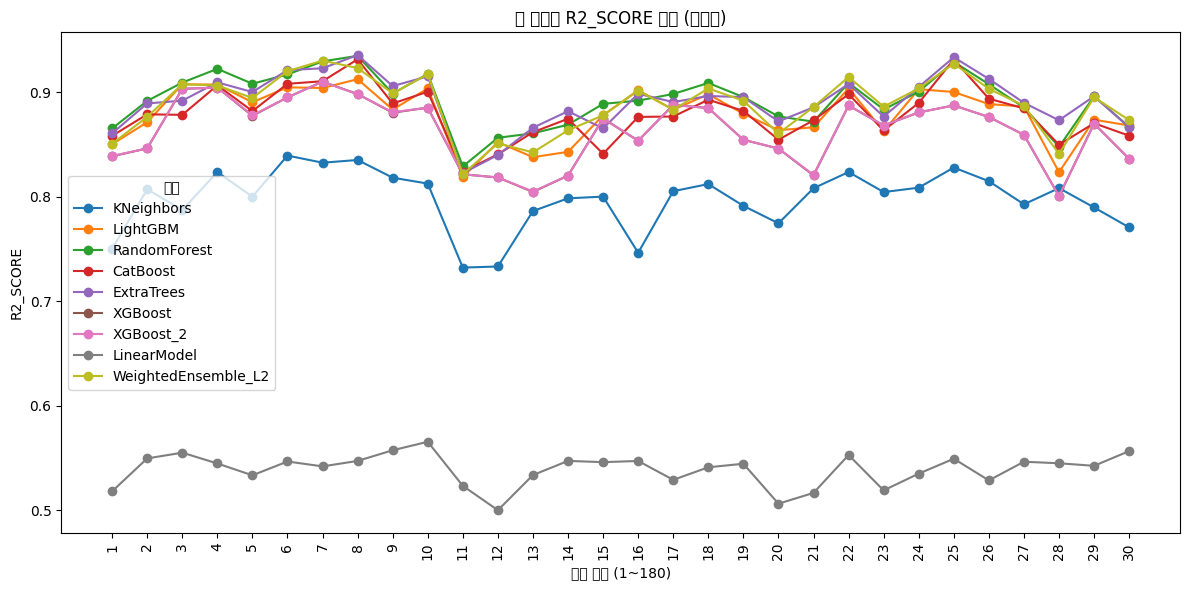

In [72]:
loss_metrics = ["mae", "mse", "rmse", "r2_score"]

for metric in loss_metrics:
    plt.figure(figsize=(12, 6))
    for m in models:
        model_df = summary_df[summary_df["model"] == m].sort_values("target_idx")
        plt.plot(model_df["target_idx"], model_df[metric], marker='o', label=f'{m}')
    plt.xlabel("타겟 번호 (1~180)")
    plt.ylabel(metric.upper())
    plt.title(f"각 타겟별 {metric.upper()} 비교 (모델별)")
    plt.legend(title="모델")
    plt.xticks(range(1, 31), rotation=90)
    plt.tight_layout()
    plt.show()
